In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [548]:
# %matplotlib notebook

In [549]:
data = pd.read_csv('finally.dat',sep="\s+",usecols = [0,1,5,8,9])
def find(a,b):
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_plate(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])
def find_pol(a,b):
    a = 270 + a/2
    b = 28 +b/2
    alphas = data['HWP_A'].values
    betas = data['HWP_B'].values
    if (a in alphas)and(b in betas):
        return(data[(data['HWP_A']==a)&(data['HWP_B']==b)])

In [550]:
def pvv(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
def pvv_f(ab,theta,phi):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
    

In [287]:
def unentangled(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(1/2*(np.cos(b)*np.cos(a)+np.sin(a)*np.sin(b)-np.cos(b)*np.sin(a)-np.sin(b)*np.cos(a))**2)
    

In [288]:
angles = np.linspace(0,360,100)
a = 0

In [289]:
ent = pvv(a,angles,45,0)
unent = unentangled(a,angles,0,0)
angles  = angles/180*np.pi
entt = 1/2*np.cos(angles)**2

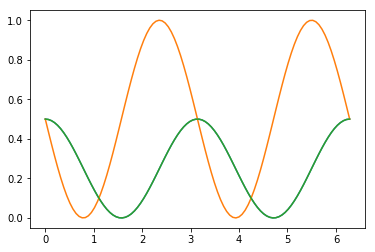

In [290]:
plt.plot(angles,ent)
plt.plot(angles,unent)
plt.plot(angles,entt)

In [291]:
find_plate(45,45)

,A,B,AB,HWP_A,HWP_B
65,57321.2,106433.53,478.92,292.5,50.5


In [292]:
alphas = np.unique(data['HWP_A'].values)
betas = np.unique(data['HWP_B'].values)

In [293]:
alphas[1:]

array([236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75, 315.  ])

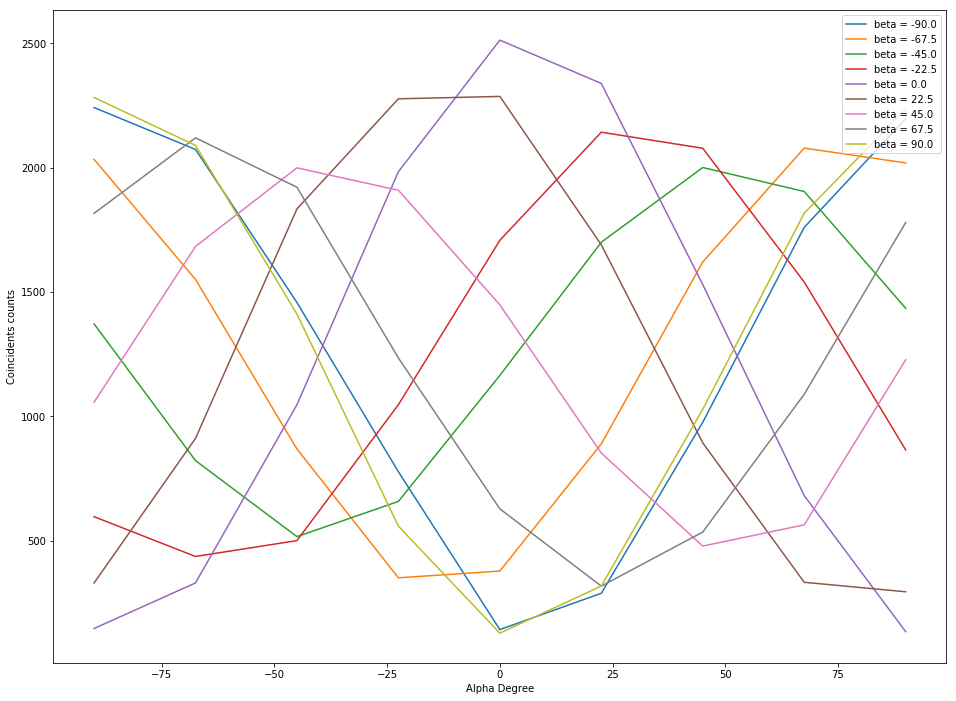

In [556]:
fig, ax = plt.subplots(figsize = (16,12))

for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
    ax.plot((np.array(alphas)-270)*2,counts, label = 'beta = {}'.format((b-28)*2))
ax.set_xlabel('Alpha Degree')
ax.set_ylabel('Coincidents counts')
plt.legend()

In [585]:
find(-45+270,11.25+28)

,A,B,AB,HWP_A,HWP_B
54,59251.6,105148.0,330.43,225.0,39.25


In [559]:
(2100-500-800+2000)/(2100+500+800+2000)

0.5185185185185185

In [581]:
(-893.9 -869.31 +1620.96 +1834.47)/(-893.9 -869.31 +1620.96 +1834.47)

1.0

In [576]:
(1700-600-600+1700)/(1700+600+600+1700)

0.4782608695652174

In [564]:
(2200-200-200+2000)/(2200+200+200+2000)

0.8260869565217391

In [577]:
0.8260869565217391+0.4782608695652174+0.37254901960784315+0.5185185185185185

2.1954153642133183

In [586]:
(2078.37+ 1921.69 -535.29 -500.9)/(2078.37+ 1921.69 +535.29 
+500.9)+(-893.9 -869.31 +1620.96 +1834.47)/(+893.9 +869.31 +1620.96 +1834.47)+(
    1708.29 +1779.49 -628.59 -597.17)/(1708.29 +1779.49 +628.59 +597.17)+(2286.78
                        +2019.41 -330.43 -295.21)/(2286.78+2019.41 +330.43 +295.21)

2.1389550643109163

In [492]:
a = 0 + 45
b = -22.5+90
find(a/2+270,b/2+28)['AB'].values[0]

535.29

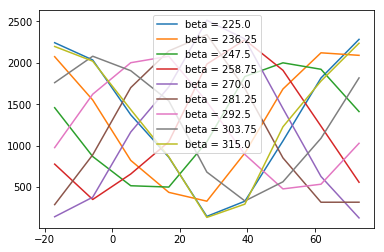

In [42]:
for a in alphas:    
    counts = []
    for b in betas:
        counts += [find(a,b)['AB'].values[0]]
    plt.plot(betas,counts, label = 'beta = {}'.format(a))
    
plt.legend()

Taking alpha as fixed and beta as mobile, we find the contrast of our measurement:

In [295]:
counts = []
b = 28
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [296]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8980683899473197

In [297]:
counts = []
b = 28+45
for i in alphas:
    counts += [find(i,b)['AB'].values[0]]

In [298]:
(max(counts)-min(counts))/(max(counts)+min(counts))

0.8931527526664124

In [464]:
data

,A,B,AB,HWP_A,HWP_B
0,60206.60,108872.13,2241.99,225.00,-17.0
1,59911.20,109035.40,2073.68,236.25,-17.0
2,59265.00,108767.27,1458.21,247.50,-17.0
3,61911.60,121952.27,777.70,258.75,-17.0
4,58403.13,108809.13,143.12,270.00,-17.0
...,...,...,...,...,...
86,57336.93,108779.53,128.83,270.00,73.0
87,57637.33,108518.73,559.05,258.75,73.0
88,58295.87,108597.40,1411.43,247.50,73.0
89,59220.33,109252.87,2089.83,236.25,73.0


In [466]:
find(225,-17)

,A,B,AB,HWP_A,HWP_B
0,60206.6,108872.13,2241.99,225.0,-17.0


In [364]:
count = {}
for b in betas:    
    counts = []
    for i in alphas: 
        counts += [find(i,b)['AB'].values[0]]
        count[i-270,b-28] = find(i,b)['AB'].values[0]



In [365]:
count

{(-45.0, -45.0): 2241.99,
 (-33.75, -45.0): 2073.68,
 (-22.5, -45.0): 1458.21,
 (-11.25, -45.0): 777.7,
 (0.0, -45.0): 143.12,
 (11.25, -45.0): 289.19,
 (22.5, -45.0): 976.79,
 (33.75, -45.0): 1760.29,
 (45.0, -45.0): 2196.57,
 (-45.0, -33.75): 2034.04,
 (-33.75, -33.75): 1551.13,
 (-22.5, -33.75): 869.31,
 (-11.25, -33.75): 351.26,
 (0.0, -33.75): 378.61,
 (11.25, -33.75): 889.75,
 (22.5, -33.75): 1620.96,
 (33.75, -33.75): 2079.0,
 (45.0, -33.75): 2019.41,
 (-45.0, -22.5): 1372.39,
 (-33.75, -22.5): 822.67,
 (-22.5, -22.5): 516.83,
 (-11.25, -22.5): 658.52,
 (0.0, -22.5): 1164.98,
 (11.25, -22.5): 1700.56,
 (22.5, -22.5): 2000.9,
 (33.75, -22.5): 1904.49,
 (45.0, -22.5): 1435.13,
 (-45.0, -11.25): 597.17,
 (-33.75, -11.25): 437.08,
 (-22.5, -11.25): 500.9,
 (-11.25, -11.25): 1047.36,
 (0.0, -11.25): 1708.29,
 (11.25, -11.25): 2142.93,
 (22.5, -11.25): 2078.37,
 (33.75, -11.25): 1540.6,
 (45.0, -11.25): 865.75,
 (-45.0, 0.0): 147.49,
 (-33.75, 0.0): 330.68,
 (-22.5, 0.0): 1047.15,
 (-

In [587]:
def prob(a,b):
    
    if (a>0) & (b>0):
        a_p = a-45
        b_p = b-45
    elif (a>=0) & (b<=0):
        a_p = a-45
        b_p = b+45
    elif (a<0) & (b>0):
        a_p = a+45
        b_p = b-45
    elif (a<=0) & (b<=0):
        a_p = 45+a
        b_p = 45+b
    if (int(100*a)%1125==0)&(int(100*b)%1125==0):
        count_vv = count[(a,b)]
        count_hv = count[(a_p,b)]
        count_vh = count[(a,b_p)]
        count_hh = count[(a_p,b_p)]
    return(count_vv/(count_vv+count_hv+count_vh+count_hh))    
        

In [439]:
def Ep(a,b):
    
    if (a>0) & (b>0):
        a_p = a-45
        b_p = b-45
    elif (a>0) & (b<=0):
        a_p = a-45
        b_p = b+45
    elif (a<=0) & (b>0):
        a_p = a+45
        b_p = b-45
    elif (a<=0) & (b<=0):
        a_p = 45+a
        b_p = 45+b
    if (int(100*a)%1125==0)&(int(100*b)%1125==0):
        count_vv = count[(a,b)]
        count_hv = count[(a_p,b)]
        count_vh = count[(a,b_p)]
        count_hh = count[(a_p,b_p)]
    return(count_vv+count_hh-count_vh-count_hv)/(count_vv+count_hv+count_vh+count_hh) 

In [462]:
Ep(45/2,22.5/2)

-0.3242645593487959

In [463]:
1/2*np.cos(np.pi*1/8)**2

0.42677669529663687

In [609]:
def EE(a,b,):
    #input polarizer angles
#     print(a,b)
    if (a>=0):
        a_p = a-90
    else: 
        a_p = a+90
    if b>= 0:
        b_p = b-90
    else:
        b_p = b+90
#         print(a_p,b_p)
#     print(prob(a,b))
#     print(a_p,b_p,)
#     print(prob(ap,bp))
#     print(prob(ap,b))
#     print(prob(a,bp))
    l = [find(a/2+270,b/2+28)['AB'].values[0],find(a_p/2+270,b_p/2+28)['AB'].values[0],
           find(a/2+270,b_p/2+28)['AB'].values[0],find(a_p/2+270,b/2+28)['AB'].values[0]]
    l = np.array(l)
    print(find(a/2+270,b/2+28)['AB'].values[0],find(a_p/2+270,b_p/2+28)['AB'].values[0],
           find(a/2+270,b_p/2+28)['AB'].values[0],find(a_p/2+270,b/2+28)['AB'].values[0])
    
    nom = find(a/2+270,b/2+28)['AB'].values[0]+find(a_p/2+270,b_p/2+28)['AB'].values[0]-find(a/2+270,b_p/2+28)['AB'].values[0]-find(a_p/2+270,b/2+28)['AB'].values[0]
    denom = find(a/2+270,b/2+28)['AB'].values[0]+find(a_p/2+270,b_p/2+28)['AB'].values[0]+find(a/2+270,b_p/2+28)['AB'].values[0]+find(a_p/2+270,b/2+28)['AB'].values[0]
    
    
    l_err = np.sqrt(l)
    err = sum(l_err*(np.array(np.sqrt((1/denom)**2+(nom/denom**2)**2))))
    
    return(nom/denom,err)
    





In [595]:
def EE1(a,b,):
    #input polarizer angles
#     print(a,b)
    if (a>=0):
        a_p = a-90
    else: 
        a_p = a+90
    if b>= 0:
        b_p = b-90
    else:
        b_p = b+90
    
#         print(a_p,b_p)
#     print(prob(a,b))
#     print(a_p,b_p,)
#     print(prob(ap,bp))
#     print(prob(ap,b))
#     print(prob(a,bp))
    print(a_p,b_p)
    
    return(np.array(pvv(a,b,theta,phi)-pvv(a,b_p,theta,phi)-pvv(a_p,b,theta,phi)+pvv(a_p,b_p,theta,phi)))
    

In [534]:
phi,theta = [128.46878858, 46.39049279 ]

In [535]:
# phi,theta,A = prop
pvv(a,b,theta,phi) 

0.3684180919504289

In [532]:
theta

46.14325672549008

In [533]:
phi

130.1729180233712

In [500]:
a = 45
b = -22.5
EE(45,-22.5)

0.5885073219161082

In [605]:
a = 45
b = -22.5
ap = 0
bp = 22.5

EE(a,b)[0]-EE(a,bp)[0]+EE(ap,b)[0]+EE(ap,bp)[0]

2078.37 1921.69 535.29 500.9
893.9 869.31 1620.96 1834.47
1708.29 1816.61 628.59 597.17
2286.78 2034.04 378.61 330.43


2.1148018093684695

In [612]:
np.sqrt(EE(a,b)[1]**2+EE(a,bp)[1]**2+EE(ap,b)[1]**2+EE(ap,bp)[1]**2)

2078.37 1921.69 535.29 500.9
893.9 869.31 1620.96 1834.47
1708.29 1816.61 628.59 597.17
2286.78 2034.04 378.61 330.43


0.0615265219900199

In [608]:
EE(a,b)[1]

2078.37 1921.69 535.29 500.9


79.4151591003581

In [599]:
EE1(a,b)-EE1(a,bp)+EE1(ap,b)+EE1(ap,bp)

-45 67.5
-45 -67.5
-90 67.5
-90 -67.5


2.2929430613976383

In [543]:
print(data)

           A          B       AB   HWP_A  HWP_B
0   60206.60  108872.13  2241.99  225.00  -17.0
1   59911.20  109035.40  2073.68  236.25  -17.0
2   59265.00  108767.27  1458.21  247.50  -17.0
3   61911.60  121952.27   777.70  258.75  -17.0
4   58403.13  108809.13   143.12  270.00  -17.0
..       ...        ...      ...     ...    ...
86  57336.93  108779.53   128.83  270.00   73.0
87  57637.33  108518.73   559.05  258.75   73.0
88  58295.87  108597.40  1411.43  247.50   73.0
89  59220.33  109252.87  2089.83  236.25   73.0
90  59560.00  109493.33  2282.65  225.00   73.0

[91 rows x 5 columns]


In [526]:
pvv(a,b,theta,phi)-pvv(a,bp,theta,phi)-pvv(ap,b,theta,phi)+pvv(ap,bp,theta,phi)

0.2278944964884725

In [527]:
pvv(a,bp,theta,phi)

0.14310554021473215

In [528]:
pvv(ap,b,theta,phi)

0.44380363284682667

In [529]:
pvv(ap,bp,theta,phi)

0.44380363284682667

In [445]:
a = 0
ap = (a-45)/2
b = (a+22.5)/2
bp = (ap-22.5)/2

In [446]:

def SS(a,b,ap,bp):
    return(Ep(a,b)-Ep(a,bp)+Ep(ap,b)+Ep(ap,bp))



In [447]:
SS(ap,b,a,bp)

1.5619743639266863

In [412]:
a = 45
b = 22.5
(find_pol(a,b)['AB'].values[0]+find_pol((a-90),(b-90))['AB'].values[0]
-find_pol((a-90),b)['AB'].values[0]-find_pol(a,(b-90))['AB'].values[0])/(find_pol(a,b)['AB'].values[0]+find_pol((a-90),(b-90))['AB'].values[0]
+find_pol((a-90),b)['AB'].values[0]+find_pol(a,(b-90))['AB'].values[0])









-0.32426455934879583

In [413]:
find_pol((a-90),b)['AB'].values[0]

1834.47

In [414]:
find_pol(a,b)['AB'].values[0]

893.9

In [478]:
EE(-45,22.5)-EE(-45,-22.5)+EE(0,22.5)+EE(0,-22.5)

2.042280807809113

In [484]:
EE(0,-22.5) - E(0,-22.5/180*np.pi)

-0.30698795626864106

In [480]:
EE(0,22.5)

0.729390101626302

In [482]:
EE(-45,22.5)

0.32426455934879594

In [470]:
a = 45/2
b = 22.5/2
ap = -45/2
bp = -67.5/2

prob(a,b)+prob(ap,bp)-prob(ap,b)-prob(a,bp)

-0.3242645593487959

In [304]:
angles = np.array(alphas)-270

In [305]:
angles

array([-45.  , -33.75, -22.5 , -11.25,   0.  ,  11.25,  22.5 ,  33.75,
        45.  ])

In [306]:
for i in angles:
    print(prob(i,-i))

0.45004396635686483
0.4225144421705402
0.40021896466142537
0.4517520279800743
0.5013385839338009
0.42702394640405394
0.400481161833699
0.41244026162877206
0.4403938457096802


In [483]:
def E(a,b):
    return(np.cos(a-b)**2-np.sin(a-b)**2)

In [641]:
def E(a,b):
#     a = a/180*np.pi
#     b = b/180*np.pi
    return(np.cos(a-b)**2-np.sin(a-b)**2)
def S(c):
    a,b,ap,bp = c
    return(-(E(a,b)-E(a,bp)+E(ap,b)+E(ap,bp)))

In [309]:
S(0,22.5,22.5,225)

1.2905010158242431

In [310]:
a = 50/180*np.pi
ap = (a-45)/180*np.pi
b = (a-22.5)/180*np.pi
bp = (ap+22.5)/180*np.pi

S(ap,b,a,bp)

1.1225711652769403

In [311]:
a = 0
ap = (a-45)/180*np.pi
b = (a-22.5)/180*np.pi
bp = (ap-22.5)/180*np.pi
a = a/180*np.pi

S(a,b,ap,bp)

1.452980173472547

In [312]:
2*np.sqrt(2)

2.8284271247461903

In [313]:
np.cos(ap)

0.7071067811865476

In [314]:
E(ap,bp)

0.7262243679293574

In [642]:
a = 0
ap = (a+45)/180*np.pi
b = (a+22.5)/180*np.pi
bp = (ap-22.5)/180*np.pi

S([ap,b,a,bp])

-2.827895687132358

In [637]:
from scipy import optimize

In [656]:
optimize.minimize(S,[-ap,b,a,bp],tol = 1e-5)

      fun: -2.8284271247458252
 hess_inv: array([[0.36089305, 0.22784495, 0.18462196, 0.22663187],
       [0.22784495, 0.36056927, 0.22853618, 0.18305984],
       [0.18462196, 0.22853618, 0.35987682, 0.22696845],
       [0.22663187, 0.18305984, 0.22696845, 0.36333435]])
      jac: array([-1.28149986e-06,  1.22189522e-06, -1.46031380e-06,  1.69873238e-06])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([-0.78197144, -0.38927217,  0.00342669,  0.39612608])

In [658]:
np.array([-0.78197144, -0.38927217,  0.00342669,  0.39612608])/np.pi*180

array([-44.80366321, -22.30365242,   0.19633487,  22.69635254])

In [644]:
0.78882508/np.pi*180

45.19634785806952

In [645]:
0.39612601/np.pi*180

22.69634852835704

In [646]:
0.00342763/np.pi*180

0.19638873273242635

In [650]:
-0.38927225/np.pi*180

-22.30365700656146

In [316]:
x = alphas
y = betas
X, Y = np.meshgrid(x, y)

In [317]:
X

array([[225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ],
       [225.  , 236.25, 247.5 , 258.75, 270.  , 281.25, 292.5 , 303.75,
        315.  ]])

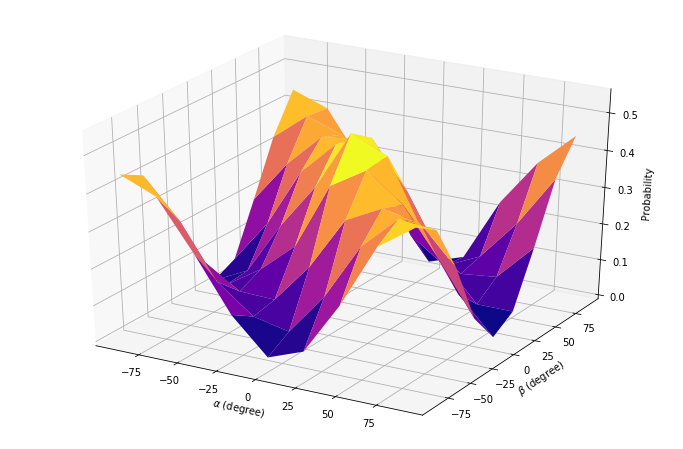

Fitted parameters:
[ 46.39049279 128.46878858]
RMS residual = 0.0396282066245658


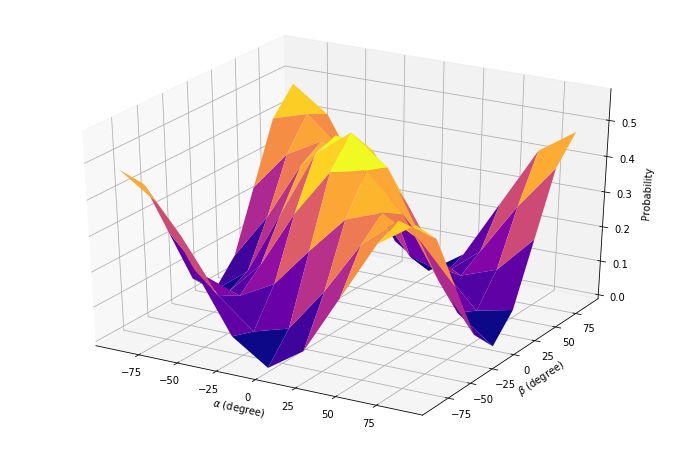

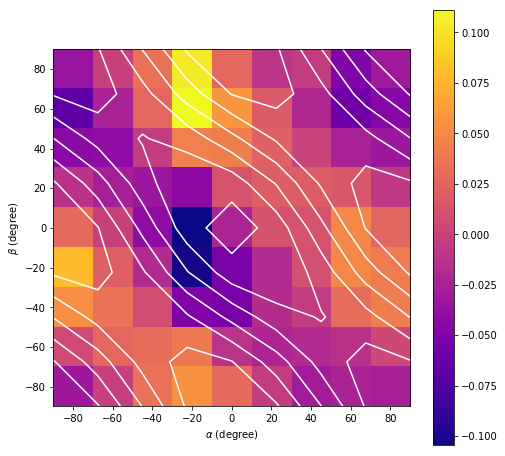

In [546]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
# xmin, xmax, nx = -5, 4, 75
# ymin, ymax, ny = -3, 7, 150
# x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def pvv(a,b,theta,phi):
    a = a/180*np.pi
    b = b/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))
def pvv_f(ab,theta,phi):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return ((np.sin(a))**2*(np.sin(b))**2*(np.cos(theta))**2+(np.cos(a))**2*(np.cos(b))**2*(np.sin(theta))**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))

Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]
Z = np.array(Z)

ZZ = np.zeros(X.shape).tolist()
for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        ZZ[i][j] = prob(a-270,b-28)
ZZ = np.array(ZZ)
# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# noise_sigma = 0.1

# The function to be fit is Z.
# Z = np.zeros(X.shape)
# for p in gprms:
#     Z += gaussian(X, Y, *p)
# Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface((X),( Y), ZZ, cmap='plasma')
ax.set_zlim(0,np.max(ZZ)+0.05)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# # This is the callable that is passed to curve_fit. M is a (2,N) array
# # where N is the total number of data points in Z, which will be ravelled
# # to one dimension.
# def _gaussian(M, *args):
#     x, y = M
#     arr = np.zeros(x.shape)
#     for i in range(len(args)//5):
#        arr += gaussian(x, y, *args[i*5:i*5+5])
#     return arr

# # Initial guesses to the fit parameters.
# guess_prms = [(0, 0, 1, 1, 2),
#               (-1.5, 5, 5, 1, 3),
#               (-4, -1, 1.5, 1.5, 6),
#               (4, 1, 1.5, 1.5, 6.5)
#              ]
# # Flatten the initial guess parameter list.
# p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = (np.vstack((X.ravel(), Y.ravel())))
Z = ZZ
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [45,72])
fit = np.zeros(ZZ.shape)
for i in range(len(popt)//2):
    fit += pvv(X, Y, *popt)
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((ZZ - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
# cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
ax.set_zlim(0,np.max(fit)+0.05)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(heatmap)
ax.contour(X, Y, fit, colors='w')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

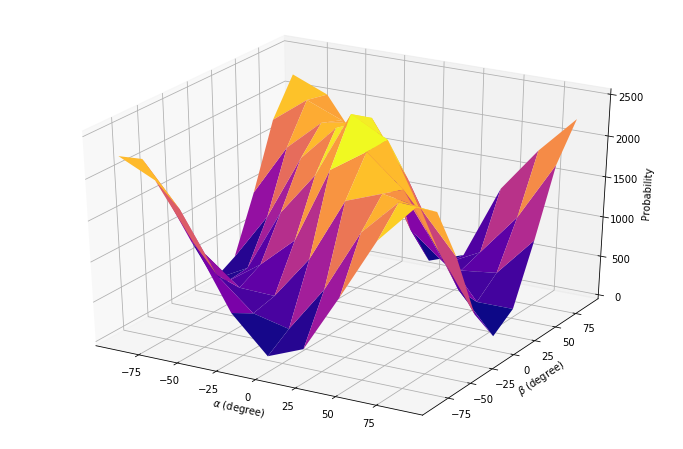

Fitted parameters:
[1.37566276e+02 5.73166053e-01 5.95661646e-01 6.21429150e+03
 1.97416503e+02]
RMS residual = 169.4689953435035


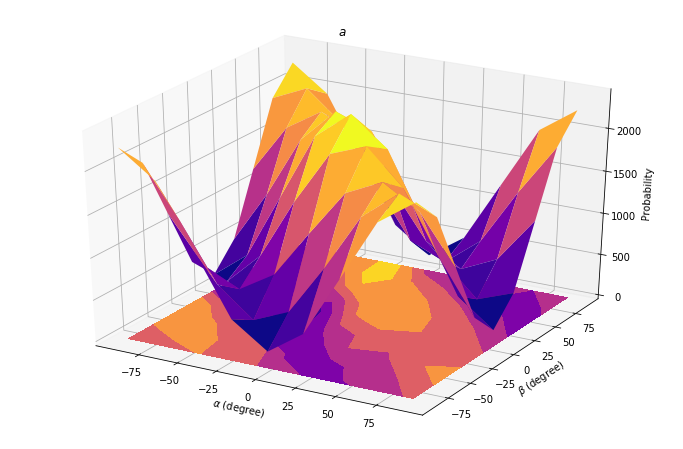

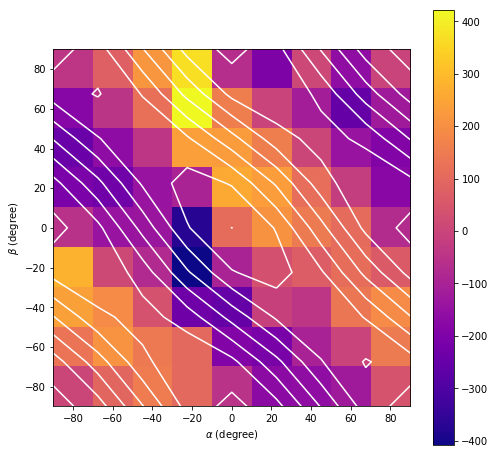

In [319]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
# xmin, xmax, nx = -5, 4, 75
# ymin, ymax, ny = -3, 7, 150
# x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def pvv_f(ab,phi,c1,c2,A,c):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
#     theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return A*(np.sin(a)**2*np.sin(b)**2*c1**2+np.cos(a)**2*np.cos(b)**2*c2**2
          +1/2*np.sin(2*a)*np.sin(2*b)*c1*c2*np.cos(phi))+c

Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]
Z = np.array(Z)

# ZZ = np.zeros(X.shape).tolist()
# for i, a in enumerate(alphas):
#     for j, b in enumerate(betas):
#         ZZ[i][j] = prob(a-270,b-28)
# ZZ = np.array(ZZ)
ZZ = Z
# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# noise_sigma = 0.1

# The function to be fit is Z.
# Z = np.zeros(X.shape)
# for p in gprms:
#     Z += gaussian(X, Y, *p)
# Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface((X),( Y), ZZ, cmap='plasma')
ax.set_zlim(0,np.max(ZZ)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

# # This is the callable that is passed to curve_fit. M is a (2,N) array
# # where N is the total number of data points in Z, which will be ravelled
# # to one dimension.
# def _gaussian(M, *args):
#     x, y = M
#     arr = np.zeros(x.shape)
#     for i in range(len(args)//5):
#        arr += gaussian(x, y, *args[i*5:i*5+5])
#     return arr

# # Initial guesses to the fit parameters.
# guess_prms = [(0, 0, 1, 1, 2),
#               (-1.5, 5, 5, 1, 3),
#               (-4, -1, 1.5, 1.5, 6),
#               (4, 1, 1.5, 1.5, 6.5)
#              ]
# # Flatten the initial guess parameter list.
# p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = (np.vstack((X.ravel(), Y.ravel())))
Z = ZZ
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [128.47081446,0.2,0.2,1000,0])
fit = np.zeros(ZZ.shape)
fit += pvv_f([X, Y], *popt)
print('Fitted parameters:')
print(popt)

rms = np.sqrt(np.mean((ZZ - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
ax.set_zlim(0,np.max(fit)+0.2)
ax.set_zlabel('Probability')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
ax.set_title(r'$a$')
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(heatmap)
ax.contour(X, Y, fit, colors='w')
ax.set_xlabel(r'$\alpha$ (degree)')
ax.set_ylabel(r'$\beta$ (degree)')
plt.show()

In [320]:
pvv_f([0,0],*popt)

2402.3266448154486

In [180]:
find(0+270,0+28)

,A,B,AB,HWP_A,HWP_B
50,57230.8,105035.73,2513.09,270.0,28.0


In [83]:
np.shape(X)

(9, 9)

In [88]:
Z = np.zeros(X.shape).tolist()
# Z = list(Z)

In [97]:
Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]

In [98]:
Z

[[2241.99, 2034.04, 1372.39, 860.7, 147.49, 330.43, 1057.32, 1816.61, 2282.65],
 [2073.68, 1551.13, 822.67, 437.08, 330.68, 911.81, 1683.46, 2120.3, 2089.83],
 [1458.21, 869.31, 516.83, 500.9, 1047.15, 1834.47, 1999.59, 1921.69, 1411.43],
 [777.7, 351.26, 658.52, 1047.36, 1984.08, 2277.16, 1909.58, 1235.29, 559.05],
 [143.12, 378.61, 1164.98, 1708.29, 2513.09, 2286.78, 1448.81, 628.59, 128.83],
 [289.19, 889.75, 1700.56, 2142.93, 2339.0, 1690.01, 852.83, 317.98, 318.36],
 [976.79, 1620.96, 2000.9, 2078.37, 1530.25, 893.9, 478.92, 535.29, 1029.0],
 [1760.29, 2079.0, 1904.49, 1540.6, 681.88, 333.31, 564.35, 1089.3, 1817.39],
 [2196.57, 2019.41, 1435.13, 865.75, 134.96, 295.21, 1227.8, 1779.49, 2235.88]]

In [105]:
 Z.ravel()

array([2241.99, 2034.04, 1372.39,  860.7 ,  147.49,  330.43, 1057.32,
       1816.61, 2282.65, 2073.68, 1551.13,  822.67,  437.08,  330.68,
        911.81, 1683.46, 2120.3 , 2089.83, 1458.21,  869.31,  516.83,
        500.9 , 1047.15, 1834.47, 1999.59, 1921.69, 1411.43,  777.7 ,
        351.26,  658.52, 1047.36, 1984.08, 2277.16, 1909.58, 1235.29,
        559.05,  143.12,  378.61, 1164.98, 1708.29, 2513.09, 2286.78,
       1448.81,  628.59,  128.83,  289.19,  889.75, 1700.56, 2142.93,
       2339.  , 1690.01,  852.83,  317.98,  318.36,  976.79, 1620.96,
       2000.9 , 2078.37, 1530.25,  893.9 ,  478.92,  535.29, 1029.  ,
       1760.29, 2079.  , 1904.49, 1540.6 ,  681.88,  333.31,  564.35,
       1089.3 , 1817.39, 2196.57, 2019.41, 1435.13,  865.75,  134.96,
        295.21, 1227.8 , 1779.49, 2235.88])

In [106]:
Z

array([[2241.99, 2034.04, 1372.39,  860.7 ,  147.49,  330.43, 1057.32,
        1816.61, 2282.65],
       [2073.68, 1551.13,  822.67,  437.08,  330.68,  911.81, 1683.46,
        2120.3 , 2089.83],
       [1458.21,  869.31,  516.83,  500.9 , 1047.15, 1834.47, 1999.59,
        1921.69, 1411.43],
       [ 777.7 ,  351.26,  658.52, 1047.36, 1984.08, 2277.16, 1909.58,
        1235.29,  559.05],
       [ 143.12,  378.61, 1164.98, 1708.29, 2513.09, 2286.78, 1448.81,
         628.59,  128.83],
       [ 289.19,  889.75, 1700.56, 2142.93, 2339.  , 1690.01,  852.83,
         317.98,  318.36],
       [ 976.79, 1620.96, 2000.9 , 2078.37, 1530.25,  893.9 ,  478.92,
         535.29, 1029.  ],
       [1760.29, 2079.  , 1904.49, 1540.6 ,  681.88,  333.31,  564.35,
        1089.3 , 1817.39],
       [2196.57, 2019.41, 1435.13,  865.75,  134.96,  295.21, 1227.8 ,
        1779.49, 2235.88]])

In [338]:
np.arcsin(0.7)/np.pi*180

44.4270040008057

In [339]:
# def monte(n,ang_err = 2):
ang_err = 0.5
n = 1000
x = 2*(alphas-270)
y = 2*(betas-28)

angle_err = np.zeros(X.shape)
angle_err += ang_err

props = []
res = []
for i in range(n):
    X, Y = np.meshgrid(x, y)
    X =  np.random.normal(X,angle_err)
    Y =  np.random.normal(Y,angle_err)
    
    # Our function to fit is going to be a sum of two-dimensional Gaussians
    def pvv_f(ab,phi,theta,A):
        a = ab[0]/180*np.pi
        b = ab[1]/180*np.pi
        theta = theta/180*np.pi
        phi = phi/180*np.pi

        return A*(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))

    Z = np.zeros(X.shape).tolist()

    for i, a in enumerate(alphas):
        for j, b in enumerate(betas):
            val = find(a,b)['AB'].values[0]
            err = np.sqrt(val)
            Z[i][j] = np.random.normal(val,err)
            
    Z = np.array(Z)

    ZZ = Z

    # ax = fig.gca(projection='3d')
    # ax.plot_surface((X),( Y), ZZ, cmap='plasma')
    # ax.set_zlim(0,np.max(ZZ)+0.2)
    # ax.set_zlabel('Probability')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

    xdata = (np.vstack((X.ravel(), Y.ravel())))
    Z = ZZ
    # Do the fit, using our custom _gaussian function which understands our
    # flattened (ravelled) ordering of the data points.
    popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [128.47081446,45,12928])
    fit = np.zeros(ZZ.shape)
    fit += pvv_f([X, Y], *popt)
    print('Fitted parameters:')
    print(popt)
    props += [list(popt)]

    
    rms = np.sqrt(np.mean((ZZ - fit)**2))
    res +=[rms]
    print('RMS residual =', rms)

    # Plot the 3D figure of the fitted function and the residuals.
    # fig = plt.figure(figsize=(12,8))
    # ax = fig.gca(projection='3d')
    # ax.plot_surface(X, Y, fit, cmap='plasma')
    # cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
    # ax.set_zlim(0,np.max(fit)+0.2)
    # ax.set_zlabel('Probability')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

    # Plot the test data as a 2D image and the fit as overlaid contours.
    # fig = plt.figure(figsize = (8,8))
    # ax = fig.add_subplot(111)
    # heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
    #           extent=(x.min(), x.max(), y.min(), y.max()))
    # plt.colorbar(heatmap)
    # ax.contour(X, Y, fit, colors='w')
    # ax.set_xlabel(r'$\alpha$ (degree)')
    # ax.set_ylabel(r'$\beta$ (degree)')
    # plt.show()

Fitted parameters:
[ 128.96487409   46.12916122 4852.6335903 ]
RMS residual = 199.59196319764519
Fitted parameters:
[ 129.51903355   46.23143587 4868.09630753]
RMS residual = 197.5922463145994
Fitted parameters:
[ 131.01312615   46.1775752  4879.27149881]
RMS residual = 198.67135422539195
Fitted parameters:
[ 130.37966816   46.09250867 4826.15294068]
RMS residual = 200.4402540277489
Fitted parameters:
[ 130.18147814   46.23020779 4880.94972456]
RMS residual = 197.3266972952054
Fitted parameters:
[ 130.55480347   46.06800242 4824.91996825]
RMS residual = 199.34944915102398
Fitted parameters:
[ 130.21189169   45.95982578 4849.3757183 ]
RMS residual = 207.76284820419542
Fitted parameters:
[ 130.46838425   46.04340037 4842.59507915]
RMS residual = 184.8400085128949
Fitted parameters:
[ 130.85494471   46.1899124  4857.61211083]
RMS residual = 203.33105514883331
Fitted parameters:
[ 130.66509257   45.87389865 4816.22661434]
RMS residual = 191.37470825308617
Fitted parameters:
[ 131.35873411 

Fitted parameters:
[ 130.1362748    46.21877878 4857.71282474]
RMS residual = 197.90975102706224
Fitted parameters:
[ 130.27134365   46.33012063 4897.25272092]
RMS residual = 192.61712707137696
Fitted parameters:
[ 130.5455218    46.12534901 4865.95772101]
RMS residual = 200.01143317857415
Fitted parameters:
[ 130.04615125   46.03326974 4871.22173731]
RMS residual = 198.04932515784054
Fitted parameters:
[ 130.00508946   45.8564141  4859.18228088]
RMS residual = 197.1277096896026
Fitted parameters:
[ 130.17184379   46.01109196 4822.3435519 ]
RMS residual = 201.8765398045116
Fitted parameters:
[ 129.58478687   46.11681051 4846.01766015]
RMS residual = 199.78945825620852
Fitted parameters:
[ 130.43771982   46.3421966  4867.91456114]
RMS residual = 192.39342711499953
Fitted parameters:
[ 129.73378914   46.39462768 4872.94409237]
RMS residual = 196.89532737043214
Fitted parameters:
[ 129.93871044   46.06441611 4838.74624675]
RMS residual = 195.25748787970815
Fitted parameters:
[ 130.5962735

Fitted parameters:
[ 130.07942391   46.11498752 4855.03570099]
RMS residual = 193.1993612640895
Fitted parameters:
[ 130.16649564   46.50424933 4862.20848716]
RMS residual = 197.53841683009318
Fitted parameters:
[ 130.17867977   46.27706377 4891.32600265]
RMS residual = 204.62217566466055
Fitted parameters:
[ 130.48611598   46.18536705 4813.38134537]
RMS residual = 196.40815402741606
Fitted parameters:
[ 130.83337994   45.93052984 4822.54886365]
RMS residual = 201.17874742313023
Fitted parameters:
[ 130.69450539   45.93484687 4845.22716722]
RMS residual = 205.45468156129508
Fitted parameters:
[ 129.68960812   45.99553705 4826.92596059]
RMS residual = 195.39842163390296
Fitted parameters:
[ 129.99399607   46.22833819 4865.39877784]
RMS residual = 196.7775948268577
Fitted parameters:
[ 130.65560372   46.0731821  4860.89856518]
RMS residual = 195.80525196719825
Fitted parameters:
[ 131.12054993   46.20087907 4853.22450345]
RMS residual = 193.7147672120845
Fitted parameters:
[ 129.82067095

Fitted parameters:
[ 130.21734497   45.86729533 4819.43257108]
RMS residual = 195.18976577319768
Fitted parameters:
[ 128.77954503   45.84150954 4861.04098463]
RMS residual = 208.3074550606756
Fitted parameters:
[ 129.5654382    46.18192548 4858.91988285]
RMS residual = 200.02184093309924
Fitted parameters:
[ 131.1178661    46.25233241 4865.31021948]
RMS residual = 193.40508750175454
Fitted parameters:
[ 130.48756933   46.28644292 4890.96469358]
RMS residual = 198.0362797769019
Fitted parameters:
[ 129.38731619   46.25518714 4864.72733297]
RMS residual = 202.77452561830248
Fitted parameters:
[ 130.7749196    46.1179986  4857.65911945]
RMS residual = 198.0871516152769
Fitted parameters:
[ 130.65247121   46.06913757 4819.28998858]
RMS residual = 199.12879920532515
Fitted parameters:
[ 130.05602097   46.20295953 4834.00581708]
RMS residual = 188.35159293804494
Fitted parameters:
[ 130.22480281   46.180746   4845.30782554]
RMS residual = 202.1281082390869
Fitted parameters:
[ 130.21780935 

Fitted parameters:
[ 129.56032408   46.19801405 4888.58414455]
RMS residual = 203.34806138118722
Fitted parameters:
[ 131.05504933   46.18782135 4865.7384057 ]
RMS residual = 198.44444923977156
Fitted parameters:
[ 129.90834441   46.17805611 4877.57638381]
RMS residual = 197.22831857491653
Fitted parameters:
[ 130.63205666   46.20814712 4881.56004144]
RMS residual = 197.99625955777273
Fitted parameters:
[ 130.54982549   46.02206372 4831.42609374]
RMS residual = 197.7892181355048
Fitted parameters:
[ 130.26222432   46.44011018 4904.4553452 ]
RMS residual = 197.44422028506028
Fitted parameters:
[ 128.90430661   46.0227625  4850.72871232]
RMS residual = 197.89405700666677
Fitted parameters:
[ 130.80579655   45.98327874 4822.42452668]
RMS residual = 196.47906276004804
Fitted parameters:
[ 131.3285378    46.08227115 4861.76474264]
RMS residual = 199.3058220116892
Fitted parameters:
[ 129.6009435    46.18347534 4887.60663205]
RMS residual = 192.59705204002634
Fitted parameters:
[ 128.9899634

Fitted parameters:
[ 130.47259051   46.12510881 4839.32281646]
RMS residual = 195.25591236481725
Fitted parameters:
[ 130.4282929    46.08193715 4854.22066148]
RMS residual = 201.99148924475568
Fitted parameters:
[ 130.4639586    46.06795246 4831.5874598 ]
RMS residual = 198.61766219880965
Fitted parameters:
[ 129.73693767   46.11455192 4869.90969434]
RMS residual = 212.002921413101
Fitted parameters:
[ 130.55578795   46.09226091 4859.32811254]
RMS residual = 195.09511160298624
Fitted parameters:
[ 130.29876231   46.32787466 4865.20523533]
RMS residual = 191.93462890837108
Fitted parameters:
[ 129.94370799   46.20997412 4888.02436973]
RMS residual = 197.48850993467272
Fitted parameters:
[ 130.50427281   46.12279861 4860.08710629]
RMS residual = 202.79432952657135
Fitted parameters:
[ 130.59607227   46.10598308 4858.84028445]
RMS residual = 196.53973768245012
Fitted parameters:
[ 129.55830658   46.31219103 4857.30306665]
RMS residual = 187.65732595075514
Fitted parameters:
[ 130.9155112

Fitted parameters:
[ 129.71112897   46.14314442 4868.8435206 ]
RMS residual = 205.7981285074512
Fitted parameters:
[ 129.97256701   46.2402979  4842.12170873]
RMS residual = 195.13894268875904
Fitted parameters:
[ 129.68096671   46.03194181 4850.63274671]
RMS residual = 190.37006211159414
Fitted parameters:
[ 130.8079342    46.1495612  4854.21694286]
RMS residual = 198.12038106345312
Fitted parameters:
[ 129.77643393   46.06343982 4831.9500584 ]
RMS residual = 204.27518408877972
Fitted parameters:
[ 130.08700209   46.22470957 4856.50380029]
RMS residual = 201.94075992548653
Fitted parameters:
[ 131.23414577   46.21358614 4863.60592884]
RMS residual = 198.7744372939273
Fitted parameters:
[ 129.99239324   46.25337262 4833.33141541]
RMS residual = 189.15712458657376
Fitted parameters:
[ 131.06082493   46.3058609  4839.50473019]
RMS residual = 198.32188961784365
Fitted parameters:
[ 129.91695179   46.06779099 4845.37048751]
RMS residual = 195.0897246172592
Fitted parameters:
[ 129.13885695

Fitted parameters:
[ 130.12391983   46.14062129 4887.81865551]
RMS residual = 196.16754840930938
Fitted parameters:
[ 130.87357874   46.50221312 4867.45101543]
RMS residual = 195.16500323601056
Fitted parameters:
[ 129.77732377   46.20234868 4859.46127207]
RMS residual = 201.799475445163
Fitted parameters:
[ 130.25766573   46.13861999 4845.42650686]
RMS residual = 198.58059500692804
Fitted parameters:
[ 130.66196795   46.15746926 4846.7423708 ]
RMS residual = 205.3210497041632
Fitted parameters:
[ 131.40282932   46.3565104  4846.35365065]
RMS residual = 200.3475779092516
Fitted parameters:
[ 130.06537392   46.13491425 4821.96787242]
RMS residual = 204.25612792074102
Fitted parameters:
[ 129.56044521   46.21721828 4855.38079033]
RMS residual = 192.05839521948485
Fitted parameters:
[ 128.83483418   45.97668313 4823.73128495]
RMS residual = 200.17546495506178
Fitted parameters:
[ 129.83968354   46.37105626 4893.89637695]
RMS residual = 203.35074394645463
Fitted parameters:
[ 128.89187889 

Fitted parameters:
[ 130.8334499    46.20737861 4858.75396083]
RMS residual = 191.970009770808
Fitted parameters:
[ 128.89706157   46.06481451 4856.04108222]
RMS residual = 192.9748112055346
Fitted parameters:
[ 131.03574259   46.22716639 4833.49265296]
RMS residual = 197.24941349545315
Fitted parameters:
[ 130.15699015   45.98404873 4832.32437496]
RMS residual = 199.75314879520525
Fitted parameters:
[ 130.28348596   45.97907505 4841.07210277]
RMS residual = 199.99411031868783
Fitted parameters:
[ 130.31416065   46.11094259 4863.5239071 ]
RMS residual = 191.27159733056902
Fitted parameters:
[ 130.49038343   46.14349845 4861.64283953]
RMS residual = 199.42903741608814
Fitted parameters:
[ 129.98343529   46.08625083 4857.06062502]
RMS residual = 197.32679685629148
Fitted parameters:
[ 130.69748656   46.16406651 4845.19713592]
RMS residual = 202.6965545831175
Fitted parameters:
[ 130.05416282   46.21025663 4818.87225826]
RMS residual = 198.32600438754912
Fitted parameters:
[ 130.99417534 

RMS residual = 197.92493075548455
Fitted parameters:
[ 130.04101297   46.09242956 4841.70061191]
RMS residual = 201.65041922535113
Fitted parameters:
[ 131.08019006   45.96953333 4873.6184158 ]
RMS residual = 196.7721529685243
Fitted parameters:
[ 130.59787236   46.36016693 4898.67109137]
RMS residual = 191.36348705267068
Fitted parameters:
[ 129.37676732   46.2247968  4861.743931  ]
RMS residual = 188.94879360753797
Fitted parameters:
[ 129.28222888   46.1459315  4868.54979619]
RMS residual = 198.50207970521
Fitted parameters:
[ 129.63216734   46.12607709 4853.47464418]
RMS residual = 193.03912540081595
Fitted parameters:
[ 129.80954307   45.91619243 4814.49696991]
RMS residual = 198.13795541689842
Fitted parameters:
[ 129.34573447   46.14875828 4865.89094424]
RMS residual = 192.20700394176671
Fitted parameters:
[ 129.12274272   46.18554705 4826.88817302]
RMS residual = 198.80281483879492
Fitted parameters:
[ 129.85457966   46.21004673 4850.08436781]
RMS residual = 195.45297608337637


Fitted parameters:
[ 130.97611372   46.06839606 4839.79563951]
RMS residual = 188.50324535675796
Fitted parameters:
[ 130.12777614   46.25398025 4857.16953677]
RMS residual = 196.56352585067114
Fitted parameters:
[ 129.51802784   45.94217407 4851.53801501]
RMS residual = 192.49773393296866
Fitted parameters:
[ 130.28055331   46.13393087 4860.35468928]
RMS residual = 193.1856040799108
Fitted parameters:
[ 130.49339211   46.19670342 4842.6256617 ]
RMS residual = 205.3290935017873
Fitted parameters:
[ 130.65697952   46.13302711 4871.05010771]
RMS residual = 196.60564192278906
Fitted parameters:
[ 129.90807312   46.20710627 4872.1470403 ]
RMS residual = 198.4893048025732
Fitted parameters:
[ 129.89876003   46.08272276 4851.32266866]
RMS residual = 196.67258783197627
Fitted parameters:
[ 129.57038309   46.20146866 4867.68207879]
RMS residual = 201.62880135533342
Fitted parameters:
[ 129.93638392   46.25170673 4869.2921535 ]
RMS residual = 192.33254231562975
Fitted parameters:
[ 131.16943976

Fitted parameters:
[ 130.06380442   46.23533353 4857.95334825]
RMS residual = 187.95781354876138
Fitted parameters:
[ 129.91627201   46.29794454 4850.95645499]
RMS residual = 196.6905529699383
Fitted parameters:
[ 129.43889707   46.06611586 4856.853009  ]
RMS residual = 193.32049365971733
Fitted parameters:
[ 130.19870651   45.96173144 4847.33540772]
RMS residual = 196.9498330572769
Fitted parameters:
[ 129.99857499   46.13336011 4871.22060647]
RMS residual = 191.28655779117275
Fitted parameters:
[ 130.64426692   46.05141864 4826.98996008]
RMS residual = 192.03511706153998
Fitted parameters:
[ 129.87152321   46.17803427 4834.84694618]
RMS residual = 192.6895186166531
Fitted parameters:
[ 129.46524961   46.09657913 4900.39052958]
RMS residual = 197.299496651142
Fitted parameters:
[ 129.97121396   45.97174946 4820.03996616]
RMS residual = 196.44643444756943
Fitted parameters:
[ 129.7018112    46.23064436 4857.20569685]
RMS residual = 200.50474558227634
Fitted parameters:
[ 130.37979573  

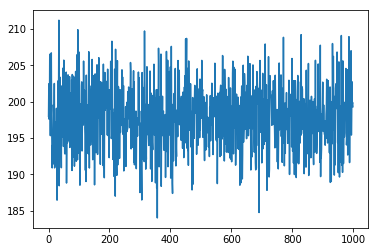

In [323]:
plt.plot(res)

In [238]:
np.mean(props[:0])

/Users/wendy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wendy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [340]:
props = np.array(props)

In [341]:
props[:0]

array([], shape=(0, 3), dtype=float64)

In [342]:
print(np.mean(props[:,0]))
np.std(props[:,0])/np.sqrt(n)

130.1729180233712


0.01865845411615016

In [343]:
print(np.mean(props[:,1]))
np.std(props[:,1])/np.sqrt(n)

46.14325672549008


0.003697088247627781

In [344]:
print(np.mean(props[:,2]))
np.std(props[:,2])/np.sqrt(n)

4853.95451397058


0.5812953777376876

In [347]:
prop = [np.mean(props[:,0]),np.mean(props[:,1]),np.mean(props[:,2])]
prop_err = [np.std(props[:,0])/np.sqrt(n),np.std(props[:,1])/np.sqrt(n),np.std(props[:,2])/np.sqrt(n)]

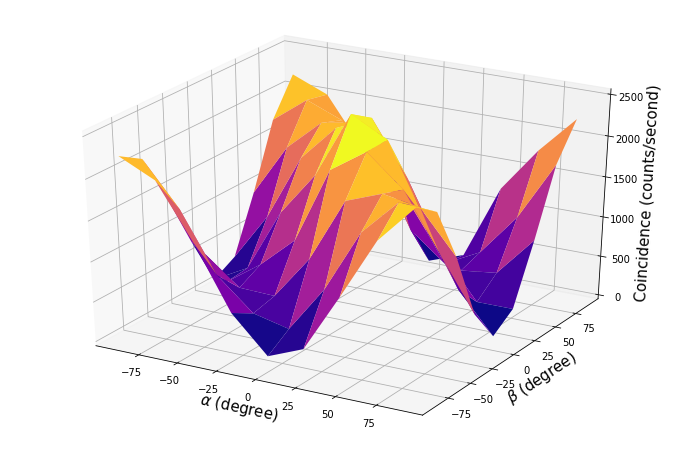

Fitted parameters:
[130.1729180233712, 46.14325672549008, 4853.95451397058]
RMS residual = 194.10480580266972


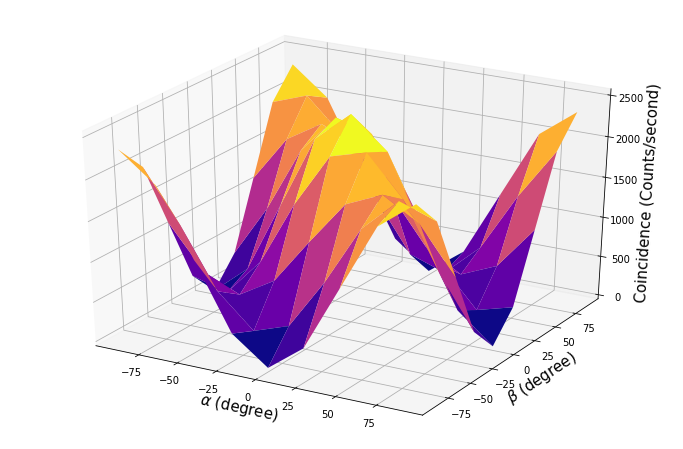

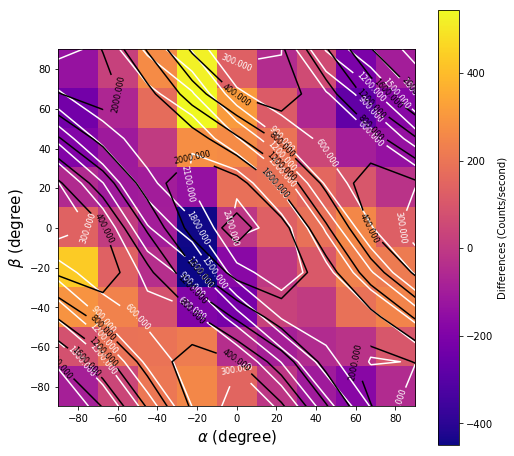

In [630]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The two-dimensional domain of the fit.
# xmin, xmax, nx = -5, 4, 75
# ymin, ymax, ny = -3, 7, 150
# x, y = np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
x = 2*(alphas-270)
y = 2*(betas-28)
X, Y = np.meshgrid(x, y)

# Our function to fit is going to be a sum of two-dimensional Gaussians
def pvv_f(ab,phi,theta,A):
    a = ab[0]/180*np.pi
    b = ab[1]/180*np.pi
    theta = theta/180*np.pi
    phi = phi/180*np.pi
    
    return A*(np.sin(a)**2*np.sin(b)**2*np.cos(theta)**2+np.cos(a)**2*np.cos(b)**2*np.sin(theta)**2
          +1/4*np.sin(2*a)*np.sin(2*b)*np.sin(2*theta)*np.cos(phi))

Z = np.zeros(X.shape).tolist()

for i, a in enumerate(alphas):
    for j, b in enumerate(betas):
        Z[i][j] = find(a,b)['AB'].values[0]
Z = np.array(Z)

# ZZ = np.zeros(X.shape).tolist()
# for i, a in enumerate(alphas):
#     for j, b in enumerate(betas):
#         ZZ[i][j] = prob(a-270,b-28)
# ZZ = np.array(ZZ)
ZZ = Z
# Standard deviation of normally-distributed noise to add in generating
# our test function to fit.
# noise_sigma = 0.1

# The function to be fit is Z.
# Z = np.zeros(X.shape)
# for p in gprms:
#     Z += gaussian(X, Y, *p)
# Z += noise_sigma * np.random.randn(*Z.shape)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection='3d')
ax.plot_surface((X),( Y), ZZ, cmap='plasma')
ax.set_zlim(0,np.max(ZZ)+0.2)
ax.set_zlabel('Coincidence (counts/second)',fontsize = 15)
ax.set_xlabel(r'$\alpha$ (degree)',fontsize = 15)
ax.set_ylabel(r'$\beta$ (degree)',fontsize = 15)
plt.show()

# # This is the callable that is passed to curve_fit. M is a (2,N) array
# # where N is the total number of data points in Z, which will be ravelled
# # to one dimension.
# def _gaussian(M, *args):
#     x, y = M
#     arr = np.zeros(x.shape)
#     for i in range(len(args)//5):
#        arr += gaussian(x, y, *args[i*5:i*5+5])
#     return arr

# # Initial guesses to the fit parameters.
# guess_prms = [(0, 0, 1, 1, 2),
#               (-1.5, 5, 5, 1, 3),
#               (-4, -1, 1.5, 1.5, 6),
#               (4, 1, 1.5, 1.5, 6.5)
#              ]
# # Flatten the initial guess parameter list.
# p0 = [p for prms in guess_prms for p in prms]

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = (np.vstack((X.ravel(), Y.ravel())))
Z = ZZ
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
# popt, pcov = curve_fit(pvv_f, xdata, ZZ.ravel(),p0 = [128.47081446,0.2,0.2,1000])
fit = np.zeros(ZZ.shape)
fit += pvv_f([X, Y], *prop)
print('Fitted parameters:')
print(prop)

rms = np.sqrt(np.mean((ZZ - fit)**2))
print('RMS residual =', rms)

# Plot the 3D figure of the fitted function and the residuals.
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, fit, cmap='plasma')
# cset = ax.contourf(X, Y, ZZ-fit, zdir='z', offset=0, cmap='plasma')
ax.set_zlim(0,np.max(fit)+0.2)
ax.set_zlabel('Coincidence (Counts/second)',fontsize = 15)
ax.set_xlabel(r'$\alpha$ (degree)',fontsize = 15)
ax.set_ylabel(r'$\beta$ (degree)',fontsize = 15)
# ax.set_title(r'$a$')
plt.show()

# Plot the test data as a 2D image and the fit as overlaid contours.
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
heatmap = ax.imshow(Z-fit, origin='bottom', cmap='plasma',
          extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar(heatmap,label = 'Differences (Counts/second)')
contours = ax.contour(X, Y, Z, colors='w')
plt.clabel(contours, inline=True, fontsize=8)
contours = ax.contour(X, Y, fit, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
ax.set_xlabel(r'$\alpha$ (degree)',fontsize = 15)
ax.set_ylabel(r'$\beta$ (degree)',fontsize = 15)
plt.show()

AttributeError: 'QuadContourSet' object has no attribute 'values'

In [622]:
sum(sum((fit-ZZ)/(np.sqrt(ZZ)))**2)/81

39.96522384582573

In [354]:
data['A'].values

array([60206.6 , 59911.2 , 59265.  , 61911.6 , 58403.13, 58055.4 ,
       58265.53, 58365.47, 58290.27, 58308.07, 58205.2 , 58076.67,
       57519.33, 57848.47, 58405.  , 58929.53, 59417.33, 59698.6 ,
       59732.8 , 59651.8 , 58845.13, 58740.2 , 58317.67, 58543.27,
       58165.93, 57850.73, 58033.8 , 58711.4 , 58006.27, 57933.4 ,
       58013.47, 57413.07, 58076.2 , 58016.13, 58619.87, 59330.4 ,
       59512.8 , 59239.67, 63488.67, 60034.4 , 57586.2 , 57384.4 ,
       57706.33, 57884.67, 57722.47, 57512.47, 57544.4 , 57332.27,
       57102.  , 57230.8 , 57698.73, 58261.93, 58818.  , 59228.67,
       59251.6 , 59126.53, 62644.87, 58102.13, 57266.67, 56892.73,
       57388.4 , 57543.93, 57529.  , 61950.27, 57426.73, 57321.2 ,
       56893.13, 57245.47, 57840.6 , 58010.4 , 58876.53, 59070.93,
       59055.93, 58875.67, 58242.6 , 57595.6 , 57587.33, 57096.2 ,
       56871.73, 57339.2 , 57805.53, 57787.  , 57838.33, 57832.73,
       57582.27, 56971.33, 57336.93, 57637.33, 58295.87, 59220

Text(0, 0.5, 'Counts/second')

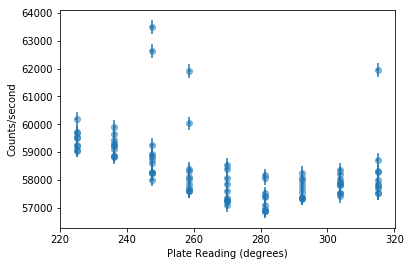

In [355]:
plt.scatter(data['HWP_A'].values,data['A'].values,alpha = 0.5)
plt.errorbar(data['HWP_A'].values,data['A'].values,yerr = np.sqrt(data['A'].values),xerr = 0.5,fmt = 'none')
plt.xlabel('Plate Reading (degrees)')
plt.ylabel('Counts/second')

Text(0, 0.5, 'Counts/second')

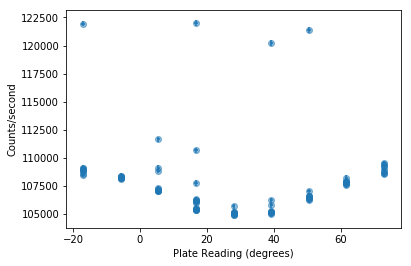

In [356]:
plt.scatter(data['HWP_B'].values,data['B'].values,alpha = 0.5)
plt.errorbar(data['HWP_B'].values,data['B'].values,yerr = np.sqrt(data['A'].values),xerr = 0.5,fmt = 'none')


plt.xlabel('Plate Reading (degrees)')
plt.ylabel('Counts/second')

In [ ]:
def S([a,b,ap,bp]):
    